In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('fer2013.csv')

# Preprocess the dataset
pixels = df['pixels'].tolist()
emotions = pd.get_dummies(df['emotion']).values


In [42]:
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(48, 48)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)

In [43]:
faces_train, faces_test, emotions_train, emotions_test = train_test_split(faces, emotions, test_size=0.2, random_state=42)


In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))


In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(faces_train, np.argmax(emotions_train, axis=1), epochs=20, 
                    validation_data=(faces_test, np.argmax(emotions_test, axis=1)))

test_loss, test_acc = model.evaluate(faces_test, np.argmax(emotions_test, axis=1), verbose=2)
print('Test accuracy:', test_acc)

Epoch 1/20
898/898 [==============================] - 34s 37ms/step - loss: 1.7922 - accuracy: 0.3555 - val_loss: 1.5180 - val_accuracy: 0.4114
Epoch 2/20
898/898 [==============================] - 33s 36ms/step - loss: 1.4099 - accuracy: 0.4584 - val_loss: 1.3715 - val_accuracy: 0.4806
Epoch 3/20
898/898 [==============================] - 34s 37ms/step - loss: 1.2899 - accuracy: 0.5078 - val_loss: 1.3252 - val_accuracy: 0.4891
Epoch 4/20
898/898 [==============================] - 35s 39ms/step - loss: 1.2095 - accuracy: 0.5416 - val_loss: 1.2898 - val_accuracy: 0.5196
Epoch 5/20
898/898 [==============================] - 36s 40ms/step - loss: 1.1352 - accuracy: 0.5761 - val_loss: 1.2512 - val_accuracy: 0.5344
Epoch 6/20
898/898 [==============================] - 37s 41ms/step - loss: 1.0647 - accuracy: 0.6028 - val_loss: 1.2537 - val_accuracy: 0.5357
Epoch 7/20
898/898 [==============================] - 38s 42ms/step - loss: 0.9764 - accuracy: 0.6385 - val_loss: 1.3090 - val_accuracy:

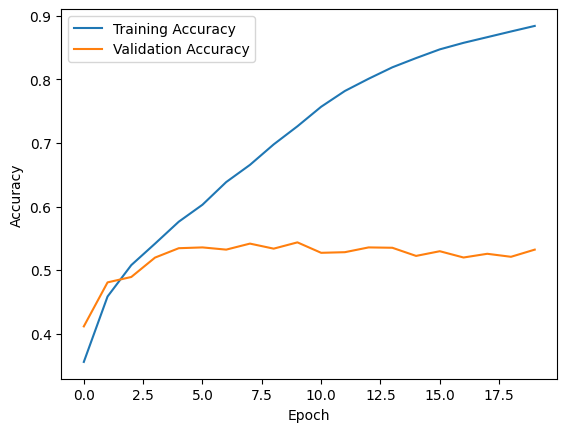

In [48]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

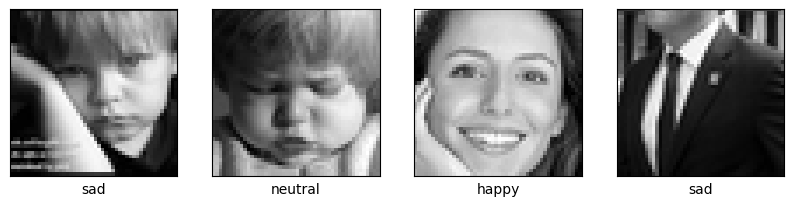

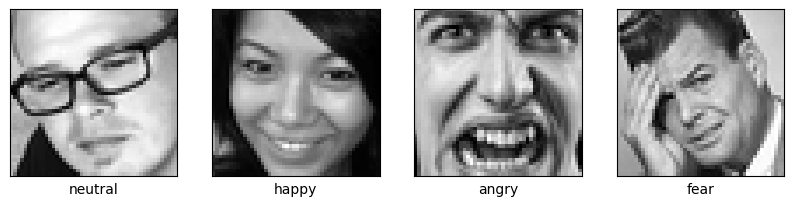

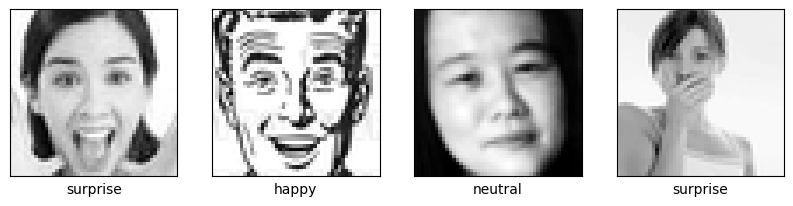

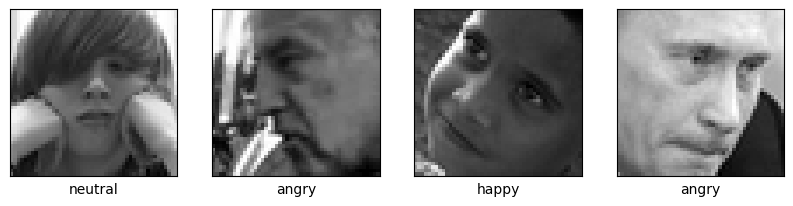

In [50]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_train[i], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_train[i])])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_train[i + 4], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_train[i + 4])])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_train[i + 8], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_train[i + 8])])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_train[i + 12], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_train[i + 12])])
plt.show()


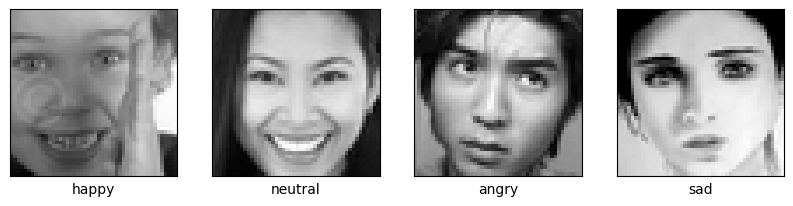

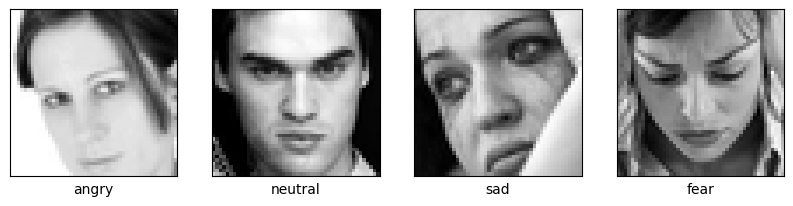

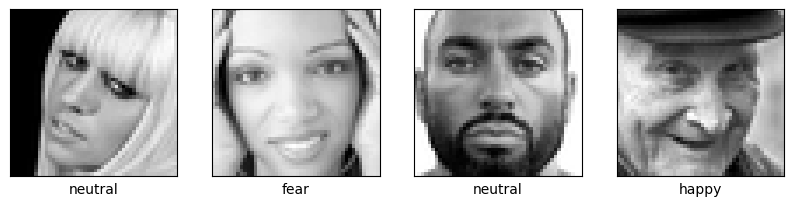

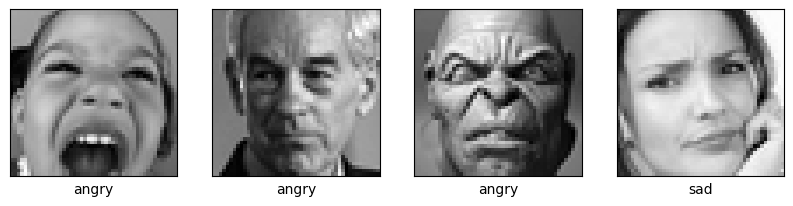

In [51]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_test[i], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_test[i])])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_test[i + 4], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_test[i + 4])])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_test[i + 8], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_test[i + 8])])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces_test[i + 12], cmap='gray')
    plt.xlabel(class_names[np.argmax(emotions_test[i + 12])])
plt.show()


In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(5))
# menampilkan arsitektur lengkap model CNN
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

2/2 [==============================] - 0s 9ms/step


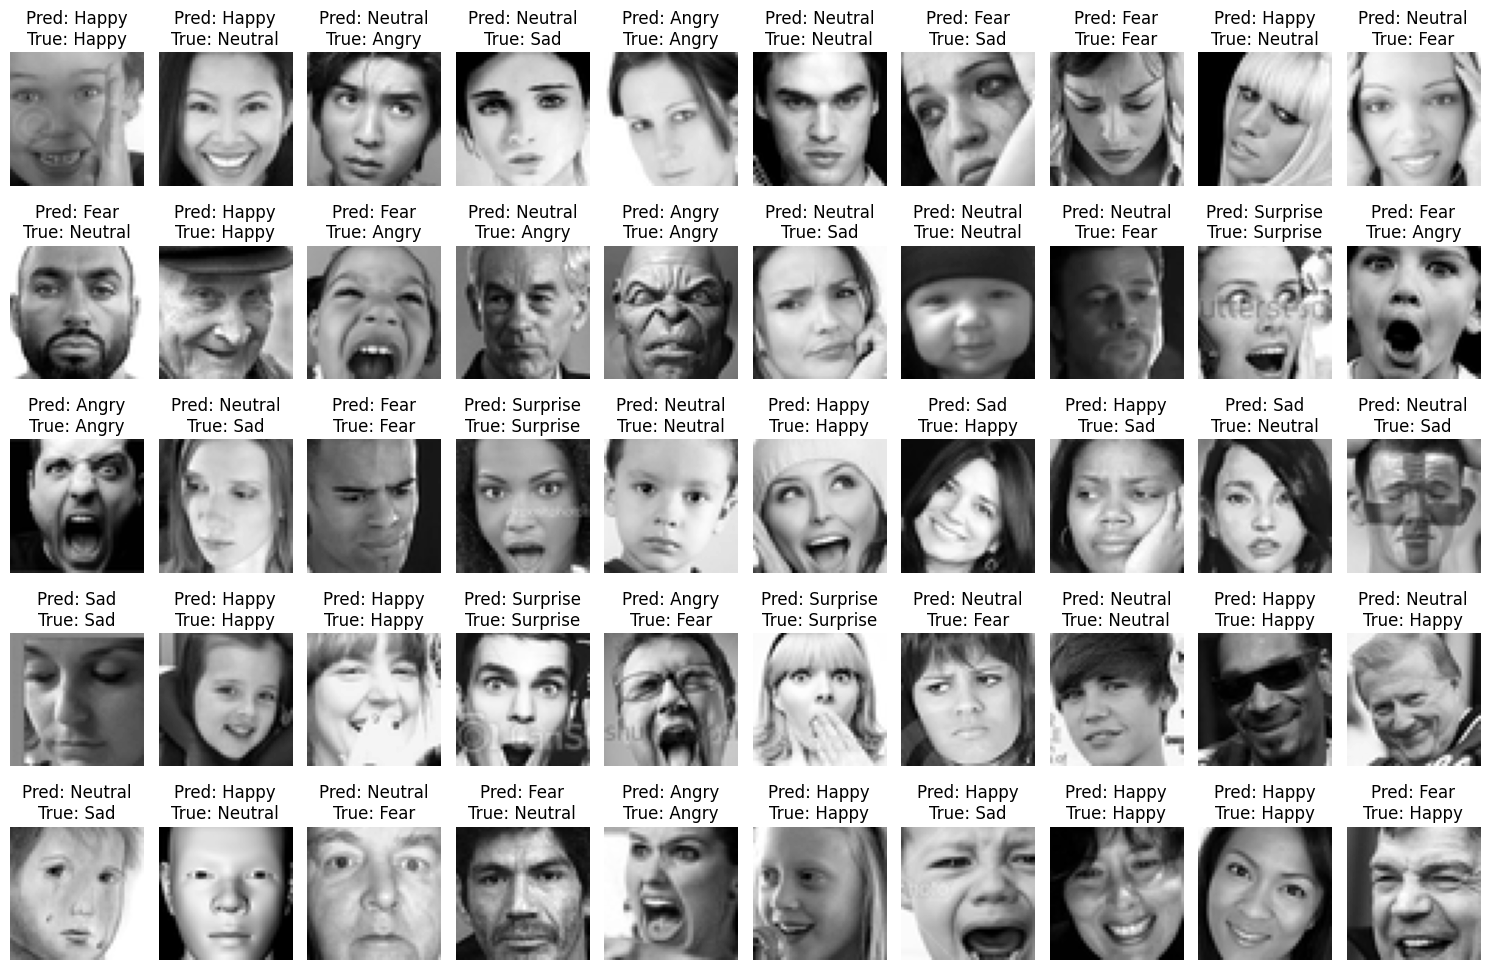

In [62]:
# Predict emotions for 50 images from the test dataset
n_images = 50
test_images = faces_test[:n_images]
test_labels = emotions_test[:n_images]

predictions = model.predict(test_images)
predicted_emotions = np.argmax(predictions, axis=1)

# Define emotion labels
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Display the predicted emotions and true emotions for each image
plt.figure(figsize=(15, 10))
for i in range(n_images):
    plt.subplot(5, 10, i+1)
    plt.imshow(test_images[i].reshape(48, 48), cmap='gray')
    plt.axis('off')
    predicted_label = class_names[predicted_emotions[i]]
    true_label = class_names[np.argmax(test_labels[i])]
    plt.title("Pred: {}\nTrue: {}".format(predicted_label, true_label))
plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 10ms/step


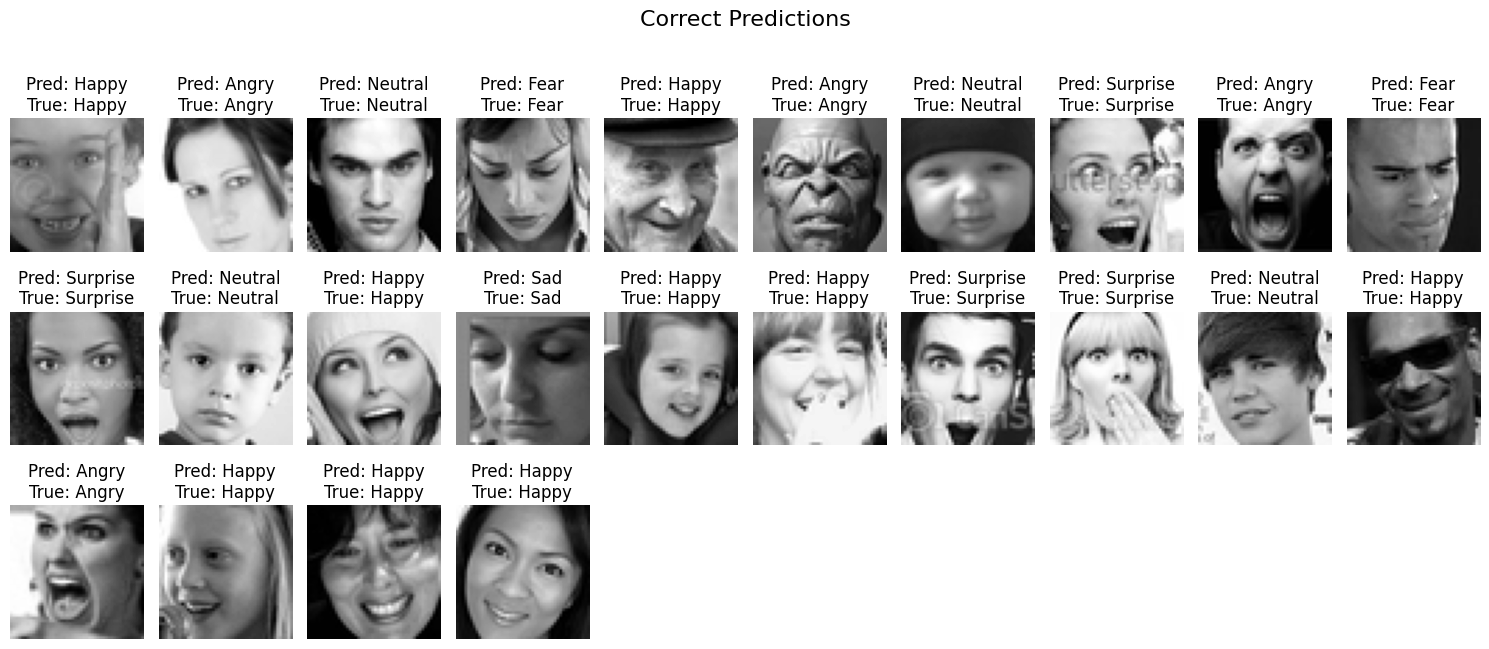

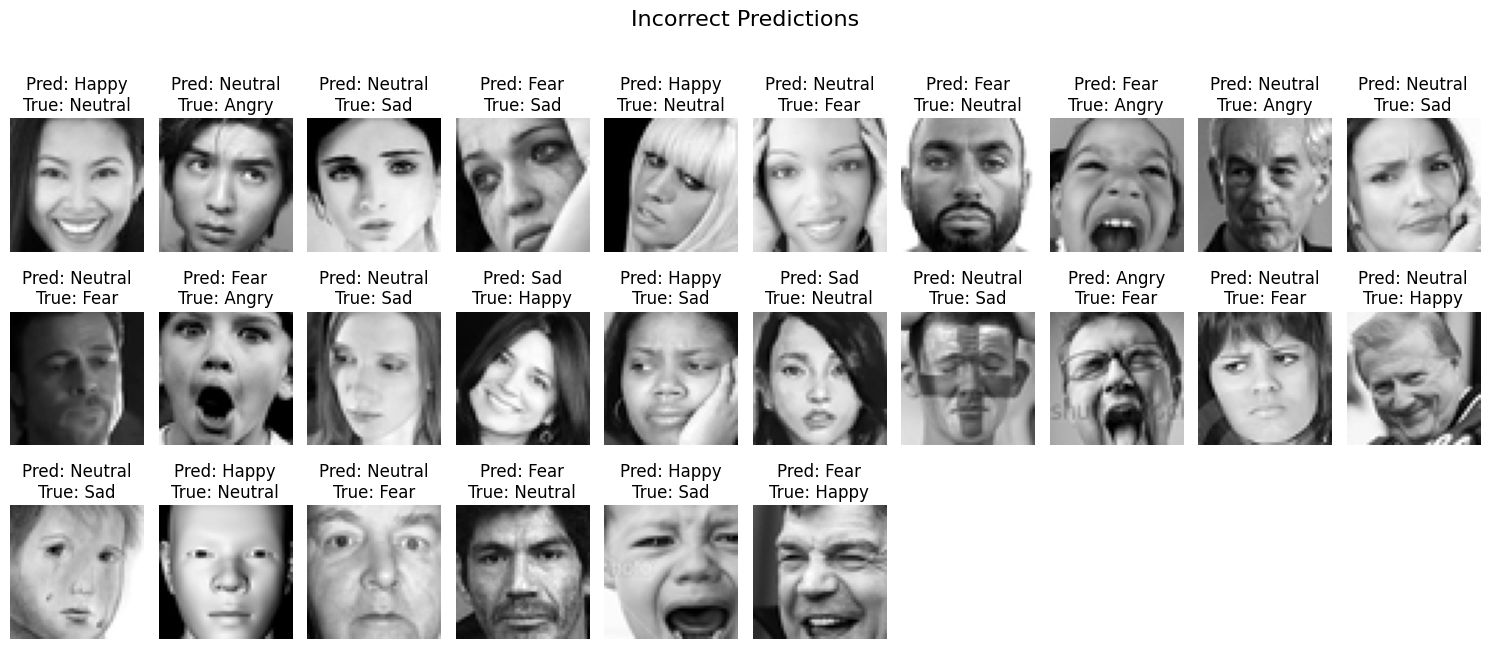

In [63]:
# Predict emotions for 50 images from the test dataset
n_images = 50
test_images = faces_test[:n_images]
test_labels = emotions_test[:n_images]

predictions = model.predict(test_images)
predicted_emotions = np.argmax(predictions, axis=1)
true_emotions = np.argmax(test_labels, axis=1)

# Define emotion labels
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Group predictions into correct and incorrect
correct_predictions = []
incorrect_predictions = []
for i in range(n_images):
    if predicted_emotions[i] == true_emotions[i]:
        correct_predictions.append(i)
    else:
        incorrect_predictions.append(i)

# Display the images with correct predictions
plt.figure(figsize=(15, 10))
for i, idx in enumerate(correct_predictions):
    plt.subplot(5, 10, i+1)
    plt.imshow(test_images[idx].reshape(48, 48), cmap='gray')
    plt.axis('off')
    plt.title("Pred: {}\nTrue: {}".format(class_names[predicted_emotions[idx]], class_names[true_emotions[idx]]))
plt.tight_layout()
plt.suptitle('Correct Predictions', fontsize=16, y=1.05)
plt.show()

# Display the images with incorrect predictions
plt.figure(figsize=(15, 10))
for i, idx in enumerate(incorrect_predictions):
    plt.subplot(5, 10, i+1)
    plt.imshow(test_images[idx].reshape(48, 48), cmap='gray')
    plt.axis('off')
    plt.title("Pred: {}\nTrue: {}".format(class_names[predicted_emotions[idx]], class_names[true_emotions[idx]]))
plt.tight_layout()
plt.suptitle('Incorrect Predictions', fontsize=16, y=1.05)
plt.show()


In [64]:
# Predict emotions for the entire test dataset
predictions = model.predict(faces_test)
predicted_emotions = np.argmax(predictions, axis=1)
true_emotions = np.argmax(emotions_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_emotions == true_emotions)
accuracy_percentage = accuracy * 100

print("Accuracy: {:.2f}%".format(accuracy_percentage))

225/225 [==============================] - 2s 10ms/step
Accuracy: 53.22%
